In [1]:
#!pip install nsepy
#!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from nsepy import get_history as gh
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot

In [3]:
start=dt.datetime(2025,1,1)
end=dt.datetime(2025,7,15)
stock_data=yf.download('RELIANCE.NS',start=start,end=end)
stock_data

C:\Users\DELL\AppData\Local\Temp\ipykernel_4560\3577741751.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data=yf.download('RELIANCE.NS',start=start,end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-01-01,1221.250000,1226.300049,1211.599976,1214.849976,5892590
2025-01-02,1241.800049,1244.449951,1220.000000,1221.250000,15486276
2025-01-03,1251.150024,1262.050049,1235.500000,1243.900024,15521102
2025-01-06,1218.000000,1262.000000,1215.000000,1253.949951,14816766
2025-01-07,1240.849976,1244.500000,1221.250000,1222.000000,10070505
...,...,...,...,...,...
2025-07-08,1537.599976,1544.900024,1530.199951,1536.000000,7171261
2025-07-09,1519.000000,1551.000000,1510.099976,1536.699951,8870660


In [4]:
stock_data.columns

MultiIndex([( 'Close', 'RELIANCE.NS'),
            (  'High', 'RELIANCE.NS'),
            (   'Low', 'RELIANCE.NS'),
            (  'Open', 'RELIANCE.NS'),
            ('Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [5]:
stock_data.columns=stock_data.columns.droplevel(1)

In [6]:
stock_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-01,1221.250000,1226.300049,1211.599976,1214.849976,5892590
2025-01-02,1241.800049,1244.449951,1220.000000,1221.250000,15486276
2025-01-03,1251.150024,1262.050049,1235.500000,1243.900024,15521102
2025-01-06,1218.000000,1262.000000,1215.000000,1253.949951,14816766
2025-01-07,1240.849976,1244.500000,1221.250000,1222.000000,10070505
...,...,...,...,...,...
2025-07-08,1537.599976,1544.900024,1530.199951,1536.000000,7171261
2025-07-09,1519.000000,1551.000000,1510.099976,1536.699951,8870660
2025-07-10,1517.199951,1524.699951,1507.500000,1519.699951,10047129


In [7]:
stock_data.index

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14',
               ...
               '2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04',
               '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10',
               '2025-07-11', '2025-07-14'],
              dtype='datetime64[ns]', name='Date', length=133, freq=None)

In [8]:
start_date=dt.datetime(2025,1,1)
end_date=dt.datetime(2025,5,13)
all_date=pd.date_range(start_date,end_date,freq='d')

In [9]:
all_date

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-05-04', '2025-05-05', '2025-05-06', '2025-05-07',
               '2025-05-08', '2025-05-09', '2025-05-10', '2025-05-11',
               '2025-05-12', '2025-05-13'],
              dtype='datetime64[ns]', length=133, freq='D')

In [10]:
stock_data.index=all_date
stock_data.index

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-05-04', '2025-05-05', '2025-05-06', '2025-05-07',
               '2025-05-08', '2025-05-09', '2025-05-10', '2025-05-11',
               '2025-05-12', '2025-05-13'],
              dtype='datetime64[ns]', length=133, freq='D')

In [11]:
stock_data

Price,Close,High,Low,Open,Volume
2025-01-01,1221.250000,1226.300049,1211.599976,1214.849976,5892590
2025-01-02,1241.800049,1244.449951,1220.000000,1221.250000,15486276
2025-01-03,1251.150024,1262.050049,1235.500000,1243.900024,15521102
2025-01-04,1218.000000,1262.000000,1215.000000,1253.949951,14816766
2025-01-05,1240.849976,1244.500000,1221.250000,1222.000000,10070505
...,...,...,...,...,...
2025-05-09,1537.599976,1544.900024,1530.199951,1536.000000,7171261
2025-05-10,1519.000000,1551.000000,1510.099976,1536.699951,8870660
2025-05-11,1517.199951,1524.699951,1507.500000,1519.699951,10047129
2025-05-12,1495.199951,1515.000000,1490.300049,1512.000000,7234991


# Stationarity Test:

In [12]:
dftest=adfuller(stock_data['Close'],autolag='AIC')

In [13]:
dftest

(-0.7063314555451785,
 0.845102724733795,
 0,
 132,
 {'1%': -3.4808880719210005,
  '5%': -2.8836966192225284,
  '10%': -2.5785857598714417},
 1031.9390768473263)

In [14]:
dfoutput=pd.Series(dftest[0:4],index=('Test Statistic','p-value','#lags used','#observations used'))

In [15]:
dfoutput

Test Statistic         -0.706331
p-value                 0.845103
#lags used              0.000000
#observations used    132.000000
dtype: float64

In [16]:
dftest[4]

{'1%': -3.4808880719210005,
 '5%': -2.8836966192225284,
 '10%': -2.5785857598714417}

In [17]:
dftest[4].items()

dict_items([('1%', -3.4808880719210005), ('5%', -2.8836966192225284), ('10%', -2.5785857598714417)])

In [18]:
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key]=value

In [19]:
dfoutput

Test Statistic           -0.706331
p-value                   0.845103
#lags used                0.000000
#observations used      132.000000
Critical value (1%)      -3.480888
Critical value (5%)      -2.883697
Critical value (10%)     -2.578586
dtype: float64

In [20]:
print('Condition for stationarity using ADF:')
print('If Test Statistic < Critical value and p-value < 0.05 --> Reject Null Hypothesis --> Stationary data')
print('Else --> Accept Null Hypothesis --> Non-Stationary data')

Condition for stationarity using ADF:
If Test Statistic < Critical value and p-value < 0.05 --> Reject Null Hypothesis --> Stationary data
Else --> Accept Null Hypothesis --> Non-Stationary data


In [21]:
dfoutput['Test Statistic']

-0.7063314555451785

In [22]:
if (
    (dfoutput['Test Statistic'] < dfoutput ['Critical value (1%)'] or 
     dfoutput['Test Statistic'] < dfoutput ['Critical value (5%)'] or 
     dfoutput['Test Statistic'] < dfoutput ['Critical value (10%)']) and 
     dfoutput['p-value'] < 0.05):
    print('Condition: Test Statistic < Critical value and p-value < 0.05 is true. Stationary as per ADF')
else:
    print('Condition: Test Statistic < Critical value and p-value < 0.05 is not true. Non- Stationary as per ADF')

Condition: Test Statistic < Critical value and p-value < 0.05 is not true. Non- Stationary as per ADF


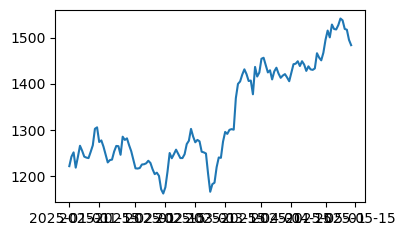

In [23]:
plt.figure(figsize=(4,2.5))
plt.plot(stock_data['Close'])

In [24]:
result_add=seasonal_decompose(stock_data['Close'],model='additive')
result_add

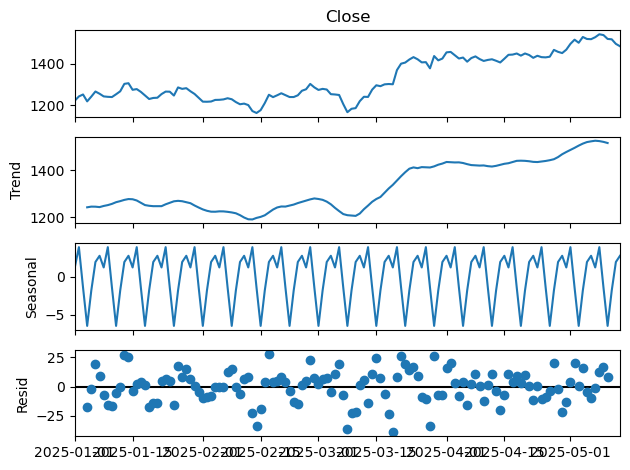

<Figure size 10x10 with 0 Axes>

In [25]:
result_add.plot()
plt.figure(figsize=(0.1,0.1))
plt.show()

In [26]:
result_mul=seasonal_decompose(stock_data['Close'],model='multiplicative')
result_mul

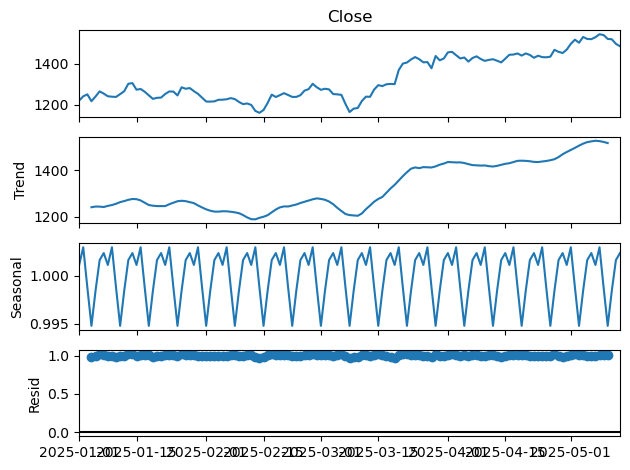

<Figure size 10x10 with 0 Axes>

In [27]:
result_mul.plot()
plt.figure(figsize=(0.1,0.1))
plt.show()

In [28]:
acf_values=acf(stock_data['Close'],nlags=50)
pacf_values=pacf(stock_data['Close'],nlags=50)
print('ACF= ',acf_values, '\nPACF= ',pacf_values)

ACF=  [ 1.          0.97364377  0.94431809  0.9136865   0.87783392  0.84248722
  0.81198141  0.78411516  0.75608753  0.7292091   0.69723693  0.66839146
  0.63777983  0.61237984  0.59368467  0.57510146  0.55498194  0.53716652
  0.52368726  0.50854077  0.49726114  0.48538722  0.47570036  0.4623995
  0.44521632  0.42715864  0.40992505  0.39115736  0.37152326  0.35506258
  0.339976    0.32364312  0.30612323  0.28665184  0.26543449  0.23994644
  0.21268565  0.18347718  0.15540159  0.12642567  0.10307252  0.07771475
  0.05109581  0.02290748 -0.00466248 -0.03207966 -0.0649953  -0.08915466
 -0.11370189 -0.1408936  -0.16998872] 
PACF=  [ 1.          0.98101986 -0.09746808 -0.04889493 -0.16038911  0.01146358
  0.11886641  0.05521573 -0.05153777 -0.03204996 -0.19581645  0.12084483
 -0.06801447  0.20570409  0.12712093 -0.08366451 -0.15839174  0.0131271
  0.18612913  0.08230547  0.07691304 -0.1430097  -0.05503224 -0.19821873
 -0.05658094  0.08568855  0.20965037 -0.07119766 -0.20870879 -0.19310536
 

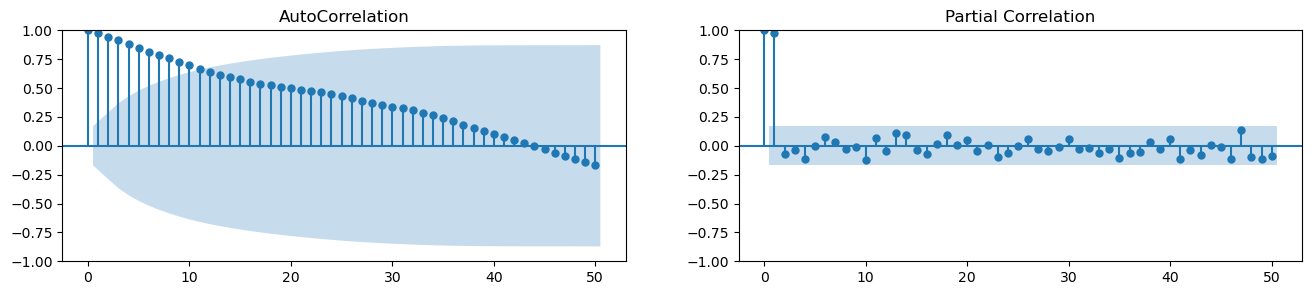

In [29]:
fig,axes=plt.subplots(1,2,figsize=(16,3))
plot_acf(stock_data['Close'],ax=axes[0],lags=50,title='AutoCorrelation')
plt.close()
plot_pacf(stock_data['Close'],ax=axes[1],lags=50,title='Partial Correlation')

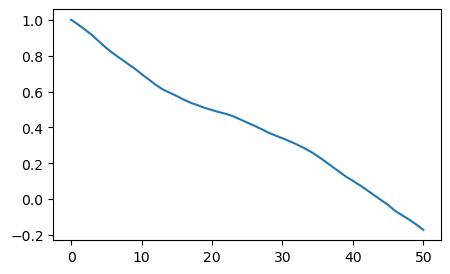

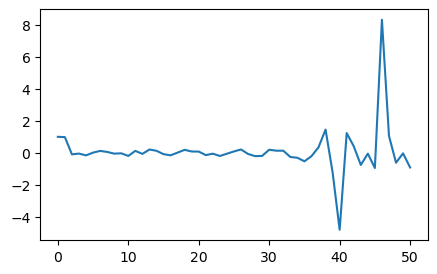

In [30]:
plt.figure(figsize=(5,3))
plt.plot(acf(stock_data['Close'],nlags=50))

plt.figure(figsize=(5,3))
plt.plot(pacf(stock_data['Close'],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

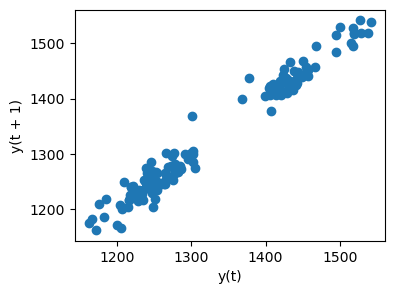

In [31]:
plt.figure(figsize=(4,3))
lag_plot(stock_data['Close'])